In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
FOLDER_PATH = os.getcwd()
FILE_NAME = "\\nyc_traffic_EDA_orig.csv"
FILE_PATH = FOLDER_PATH + FILE_NAME
nyc_traffic_EDA_orig = pd.read_csv(FILE_PATH)
nyc_traffic_EDA = nyc_traffic_EDA_orig.copy()

In [3]:
#nyc_traffic_EDA["Traffic_Volume_orig"] = nyc_traffic_EDA["Traffic_Volume"]
#nyc_traffic_EDA["Traffic_Volume"] = (nyc_traffic_EDA["Traffic_Volume"]+1).apply(np.log)

In [4]:
LANDUSE_COLUMNS = [col for col in nyc_traffic_EDA.columns if col[:9] == "LandUse_t"]

LANDUSE_TYPES = []
LANDUSE_TYPES += ["Residential"]
LANDUSE_TYPES += ["Business"]
LANDUSE_TYPES += ["Infrastructure"]
LANDUSE_TYPES += ["Public Institutions"]
LANDUSE_TYPES += ["Outside"]

LANDUSE_LOOKUP = dict(zip(LANDUSE_COLUMNS, LANDUSE_TYPES))

* SubwayProximity = Numerical
* StreetWidth = Numerical
* NumFloors = Numerical 
* Traffic Volume = Numerical 
* SegCount = Numerical
* Is_Weekend = Boolean
* Season = Categorical =(One-Hot-Encoded)=> Boolean
* 3_Hr_Intvl = Categorical (Temporal, Ordinal)
* BoroCode = Categorical
* LandUse = Categorical =(One-Hot-Encoded)=> Numerical

In [5]:
#ax1 = plt.hist(nyc_traffic_EDA["SubwayProximity"])
#ax2 = plt.hist(nyc_traffic_EDA["StreetWidth"])
#ax3 = plt.hist(nyc_traffic_EDA["Traffic_Volume"])
#ax4 = plt.hist(nyc_traffic_EDA["NumFloors"])
#ax5 = nyc_traffic_EDA["Is_Weekend"].value_counts().plot(kind="bar")
#ax6 = nyc_traffic_EDA["Season"].value_counts().plot(kind="bar")
#ax7 = nyc_traffic_EDA["BoroCode"].value_counts().plot(kind="bar")

In [6]:
def get_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    series_data = ((series < (Q1 - 1.5*IQR)) | (series > (Q3 + 1.5*IQR)))
    return pd.Series(series_data)

In [7]:
get_outliers(nyc_traffic_EDA["Traffic_Volume"]).mean()

0.08618184334348188

## 2 Variables: Categorical vs Categorical

#### Residential Proportion of Boroughs
* How "residential" are each of the boroughs, from the lens of our hopefully unbiased custom dataset?

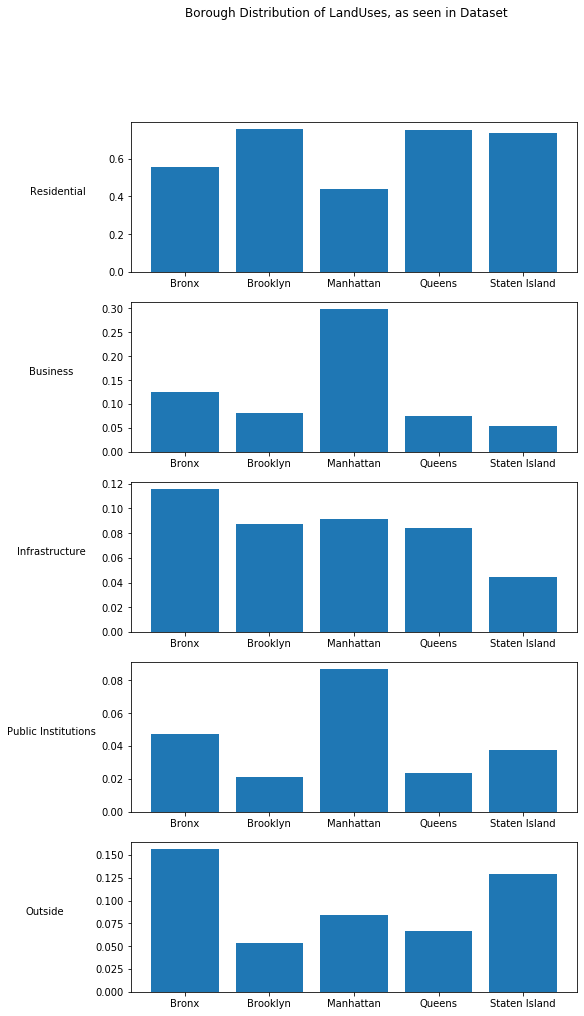

In [8]:
fig, axs = plt.subplots(len(LANDUSE_COLUMNS), sharex=False,figsize=(8,16))
fig.suptitle('Borough Distribution of LandUses, as seen in Dataset')
for i in range(len(LANDUSE_COLUMNS)):
    LANDUSE_COLUMN = LANDUSE_COLUMNS[i]
    LANDUSE_TYPE = LANDUSE_TYPES[i]
    mean_landuse_prop_by_borough = nyc_traffic_EDA.groupby(["BoroCode"])[LANDUSE_COLUMN].mean()
    axs[i].bar(mean_landuse_prop_by_borough.index,mean_landuse_prop_by_borough.values)
    axs[i].set_ylabel(LANDUSE_TYPE, rotation=0, labelpad=50)

### 2 Variables: Categorical vs Numerical

In [9]:
def EDA_barplot(TABLE, CATEGORICAL_COLUMN_NAME, NUMERICAL_COLUMN_NAME):
    TITLE = "{0} by {1}".format(CATEGORICAL_COLUMN_NAME, NUMERICAL_COLUMN_NAME)
    ax = TABLE.groupby([CATEGORICAL_COLUMN_NAME])[NUMERICAL_COLUMN_NAME].mean().plot(kind="bar")
    ax.set_title(TITLE)
    ax.set_ylabel("Mean {0}".format(NUMERICAL_COLUMN_NAME))
    return ax

In [10]:
def EDA_boxplot(TABLE, CATEGORICAL_COLUMN_NAME, NUMERICAL_COLUMN_NAME):
    TITLE = "{0} by {1}".format(CATEGORICAL_COLUMN_NAME, NUMERICAL_COLUMN_NAME)
    grouped = TABLE[[CATEGORICAL_COLUMN_NAME, NUMERICAL_COLUMN_NAME]].groupby([CATEGORICAL_COLUMN_NAME])
    ax1 = grouped.boxplot(subplots=False, showfliers=False, rot=90)
    #ax.set_title(TITLE)
    #ax.set_ylabel("Mean {0}".format(NUMERICAL_COLUMN_NAME))
    return ax1

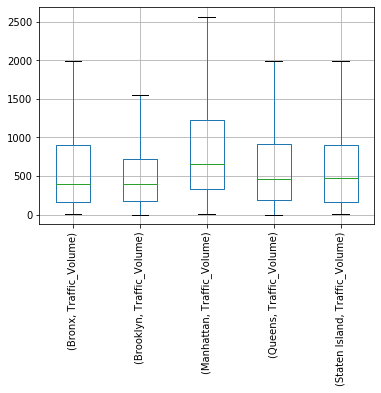

In [11]:
EDA_boxplot(nyc_traffic_EDA, "BoroCode", "Traffic_Volume")

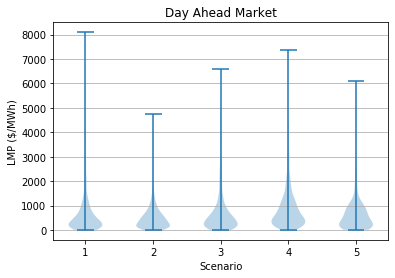

In [12]:
fig, axes = plt.subplots()
TABLE = nyc_traffic_EDA.copy()
boroughs = list(pd.unique(TABLE["BoroCode"]))
violinplot_dataset = [
    TABLE[TABLE["BoroCode"] == borough]["Traffic_Volume"].values for borough in boroughs
]
axes.violinplot(dataset = violinplot_dataset )

axes.set_title('Day Ahead Market')
axes.yaxis.grid(True)
axes.set_xlabel('Scenario')
axes.set_ylabel('LMP ($/MWh)')

plt.show()

In [13]:
# EDA_barplot(nyc_traffic_EDA, "Season", "Traffic_Volume")

In [16]:
#EDA_scatterplot(nyc_traffic_EDA, "UnitsRes_Prop", "LandUse_t1") # good

### Higher Variable Dimension Data Analysis

#### Boroughs and their traffic volume by time of day

c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


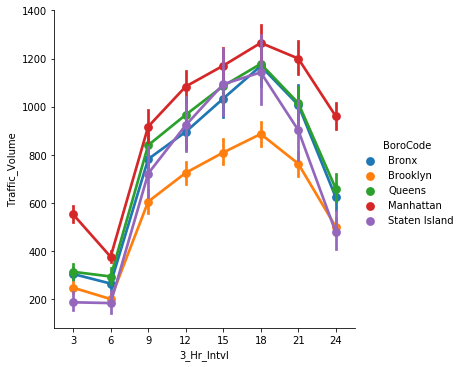

In [17]:
colors = ["cyan", "purple", "blue", "magenta", "black"]
GROUP_LABEL = "BoroCode"
X_LABEL = "3_Hr_Intvl"
Y_LABEL = "Traffic_Volume"
TABLE = nyc_traffic_EDA.copy()
sns.factorplot(data=TABLE, x=X_LABEL, y=Y_LABEL, hue=GROUP_LABEL)

#### Predominant LandUse and their traffic volume by time of day

In [18]:
#nyc_traffic_EDA["Predominant_LandUse"].value_counts()

c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


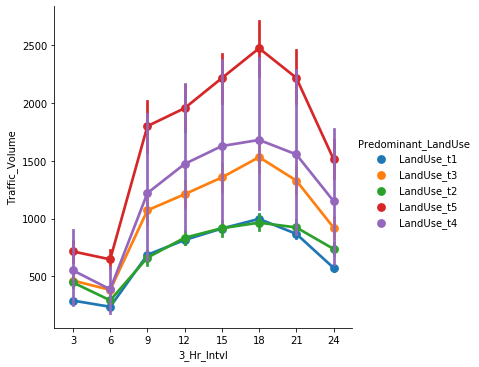

In [19]:
nyc_traffic_EDA["Predominant_LandUse"] = nyc_traffic_EDA.loc[:,LANDUSE_COLUMNS].idxmax(axis=1)
GROUP_LABEL = "Predominant_LandUse"
X_LABEL = "3_Hr_Intvl"
Y_LABEL = "Traffic_Volume"
TABLE = nyc_traffic_EDA.copy()
sns.factorplot(data=TABLE, x=X_LABEL, y=Y_LABEL, hue=GROUP_LABEL,alpha=0.1)

Text(0.5, 1.0, 'LandUse and Traffic Volume during Time of Day')

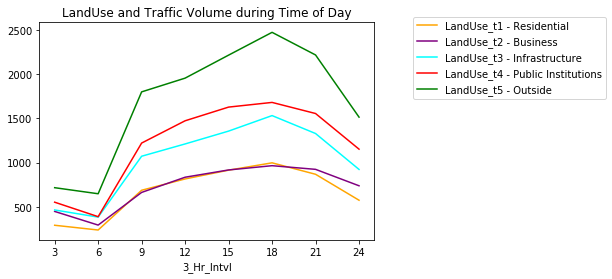

In [20]:
nyc_traffic_EDA["Predominant_LandUse"] = nyc_traffic_EDA.loc[:,LANDUSE_COLUMNS].idxmax(axis=1)

colors = ["orange", "purple", "cyan", "red", "green"]

nyc_traffic_EDA_weekdays = nyc_traffic_EDA#[nyc_traffic_EDA["Is_Weekend"]==False]
fig, ax = plt.subplots()
ax.set_xticks(range(0,27,3))
df_grouped = nyc_traffic_EDA_weekdays.groupby(["Predominant_LandUse"])
for i in range(len(df_grouped)):
    key, group = list(df_grouped)[i]
    group.groupby('3_Hr_Intvl')['Traffic_Volume'].mean().plot(ax=ax,label=str(key)+" - "+LANDUSE_LOOKUP[key],c=colors[i])
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title("LandUse and Traffic Volume during Time of Day")

c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


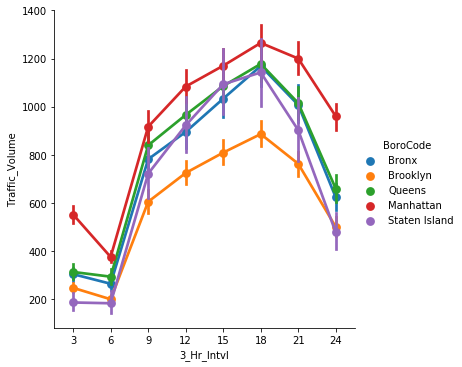

In [21]:
colors = ["cyan", "purple", "blue", "magenta", "black"]
boroughs = list(pd.unique(TABLE["BoroCode"]))
GROUP = boroughs
GROUP_LABEL = "BoroCode"
X_LABEL = "3_Hr_Intvl"
Y_LABEL = "Traffic_Volume"
TABLE = nyc_traffic_EDA.copy()
sns.factorplot(data=TABLE, x=X_LABEL, y=Y_LABEL, hue=GROUP_LABEL)

#### Is_Weekend and their traffic volume by time of day

c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


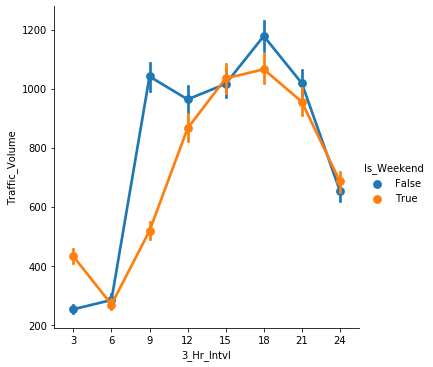

In [22]:
GROUP_LABEL = "Is_Weekend"
X_LABEL = "3_Hr_Intvl"
Y_LABEL = "Traffic_Volume"
TABLE = nyc_traffic_EDA.copy()
sns.factorplot(data=TABLE, x=X_LABEL, y=Y_LABEL, hue=GROUP_LABEL,alpha=0.1)

Text(0.5, 1.0, 'Is_Weekend and Traffic Volume during Time of Day')

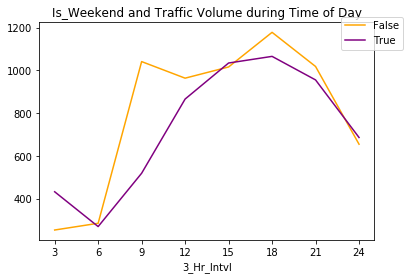

In [23]:
colors = ["orange", "purple", "cyan", "red", "green"]

nyc_traffic_EDA_weekdays = nyc_traffic_EDA#[nyc_traffic_EDA["Is_Weekend"]==False]
fig, ax = plt.subplots()
ax.set_xticks(range(0,27,3))
df_grouped = nyc_traffic_EDA_weekdays.groupby(["Is_Weekend"])
for i in range(len(df_grouped)):
    key, group = list(df_grouped)[i]
    group.groupby('3_Hr_Intvl')['Traffic_Volume'].mean().plot(ax=ax,label=str(key),c=colors[i])
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title("Is_Weekend and Traffic Volume during Time of Day")

## Hypothesis Testing

### Hypothesis Testing Between Traffic Volume, NumFloors, SubwayProximity

Text(0, 0.5, 'Traffic_Volume')

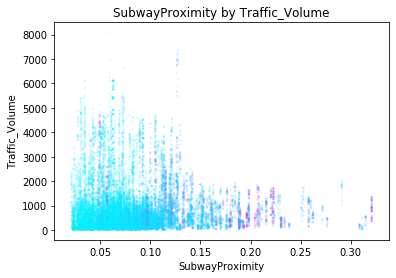

In [26]:
NUMERICAL_COLUMN_1_NAME = "SubwayProximity"
NUMERICAL_COLUMN_2_NAME = "Traffic_Volume"
NUMERICAL_COLUMN_3_NAME = "NumFloors"
TABLE = nyc_traffic_EDA.copy()
TITLE = "{0} by {1}".format(NUMERICAL_COLUMN_1_NAME, NUMERICAL_COLUMN_2_NAME)
X_LABEL = NUMERICAL_COLUMN_1_NAME
Y_LABEL = NUMERICAL_COLUMN_2_NAME
NUMERICAL_COLUMN_1 = TABLE[NUMERICAL_COLUMN_1_NAME]
NUMERICAL_COLUMN_2 = TABLE[NUMERICAL_COLUMN_2_NAME]
# color column
NUMERICAL_COLUMN_3 = TABLE[NUMERICAL_COLUMN_3_NAME]


LEVEL = 2
NUMERICAL_COLUMN_3 = NUMERICAL_COLUMN_3 #exagerate
NUMERICAL_COLUMN_3 = (NUMERICAL_COLUMN_3).round(LEVEL)
SCALING = 10**LEVEL
color_ranger = np.arange(NUMERICAL_COLUMN_3.min()*SCALING, NUMERICAL_COLUMN_3.max()*SCALING)
colors = plt.cm.cool(np.linspace(0, 1, len(color_ranger)))
#colors = plt.cm.cool(color_ranger)

COLUMN_3_COLORS = NUMERICAL_COLUMN_3.apply(lambda x: colors[int(x*100)-1])

fig, ax = plt.subplots()
ax.scatter(NUMERICAL_COLUMN_1, NUMERICAL_COLUMN_2,s=2, alpha=0.1, c=COLUMN_3_COLORS)
ax.set_title(TITLE)
ax.set_xlabel(X_LABEL)
ax.set_ylabel(Y_LABEL)

Text(0, 0.5, 'NumFloors')

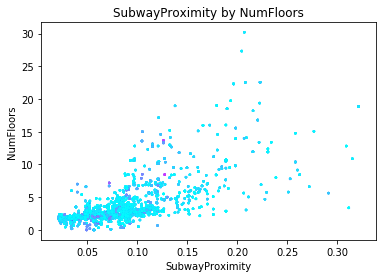

In [27]:
NUMERICAL_COLUMN_1_NAME = "SubwayProximity"
NUMERICAL_COLUMN_2_NAME = "NumFloors"
NUMERICAL_COLUMN_3_NAME = "Traffic_Volume"
TABLE = nyc_traffic_EDA.copy()
TITLE = "{0} by {1}".format(NUMERICAL_COLUMN_1_NAME, NUMERICAL_COLUMN_2_NAME)
X_LABEL = NUMERICAL_COLUMN_1_NAME
Y_LABEL = NUMERICAL_COLUMN_2_NAME

#TABLE = TABLE[(TABLE["BoroCode"] != "Manhattan")]
#TABLE = TABLE[(TABLE["SubwayProximity"] <= 0.20)]


NUMERICAL_COLUMN_1 = TABLE[NUMERICAL_COLUMN_1_NAME]
NUMERICAL_COLUMN_2 = TABLE[NUMERICAL_COLUMN_2_NAME]
# color column
NUMERICAL_COLUMN_3 = TABLE[NUMERICAL_COLUMN_3_NAME]


LEVEL = 2
NUMERICAL_COLUMN_3 = NUMERICAL_COLUMN_3 #// 50 #exagerate
NUMERICAL_COLUMN_3 = (NUMERICAL_COLUMN_3).round(LEVEL)

SCALING = 10**LEVEL
color_ranger = np.arange(NUMERICAL_COLUMN_3.min()*SCALING, NUMERICAL_COLUMN_3.max()*SCALING)
colors = plt.cm.cool(np.linspace(0, 1, len(color_ranger)))
#colors = plt.cm.cool(color_ranger)

COLUMN_3_COLORS = NUMERICAL_COLUMN_3.apply(lambda x: colors[int(x*100)-1])

fig, ax = plt.subplots()
ax.scatter(NUMERICAL_COLUMN_1, NUMERICAL_COLUMN_2,s=2, alpha=0.5, c=COLUMN_3_COLORS)
ax.set_title(TITLE)
ax.set_xlabel(X_LABEL)
ax.set_ylabel(Y_LABEL)

### Hypothesis Testing For Borough and Traffic Volume

* Permutation Testing with Total Variation Distance
* Permutation Testing for Individual Boroughs

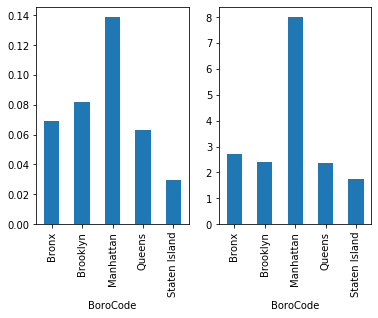

In [24]:
fig, axs = plt.subplots(1, 2)
nyc_traffic_EDA.groupby(["BoroCode"])["SubwayProximity"].mean().plot(kind="bar",ax=axs[0])
nyc_traffic_EDA.groupby(["BoroCode"])["NumFloors"].mean().plot(kind="bar", ax=axs[1])

#### Permutation Testing with Total Variation DIstance: Borough and Traffic Volume

In [70]:
def get_tvd(dist1, dist2):
    tvd = (
        (dist1-dist2).abs()
    ).sum() * 0.5
    return tvd

nyc_traffic_EDA_temp = nyc_traffic_EDA.copy()
#nyc_traffic_EDA_temp = nyc_traffic_EDA[nyc_traffic_EDA["BoroCode"] != "Manhattan"]

TABLE = nyc_traffic_EDA_temp
GROUPBY_COLUMN_NAME = "BoroCode"
AGGREG_COLUMN_NAME = "Traffic_Volume"
SHUFFLED_COLUMN_NAME = GROUPBY_COLUMN_NAME
SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values

OBSERVED_DIST = TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean()

AGGREG_GENERAL_MEAN = TABLE[AGGREG_COLUMN_NAME].mean()
GROUP_LABELS = pd.unique(TABLE[GROUPBY_COLUMN_NAME])
EXPECTED_DIST = pd.Series(index = GROUP_LABELS, data=AGGREG_GENERAL_MEAN)

OBSERVED_TVD = get_tvd(OBSERVED_DIST, EXPECTED_DIST)

T = 1000

TEST_STATS = []

for i in range(T):
    SHUFFLED_COLUMN = np.random.permutation(SHUFFLED_COLUMN)
    # shuffle
    TABLE[SHUFFLED_COLUMN_NAME] = SHUFFLED_COLUMN
    # re-assign
    SAMPLE_DIST = TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean()
    SAMPLE_TVD = get_tvd(SAMPLE_DIST, EXPECTED_DIST)
    TEST_STATS.append(SAMPLE_TVD)

plt.hist(TEST_STATS)
plt.scatter(OBSERVED_TVD, 0, c="red")

#### Permutation Testing: Individual Borough and Traffic Volume

In [ ]:
def ABTesting_Borough_Traffic(BORO):
    nyc_traffic_EDA_temp = nyc_traffic_EDA.copy()
    BORO_CHOICE = BORO
    TABLE = nyc_traffic_EDA_temp
    GROUPBY_COLUMN_NAME = "BoroCode"
    AGGREG_COLUMN_NAME = "Traffic_Volume"
    SHUFFLED_COLUMN_NAME = GROUPBY_COLUMN_NAME
    #SHUFFLED_COLUMN_NAME = AGGREG_COLUMN_NAME
    SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values
    AB_TESTING_PLOT_TITLE = "A/B Testing for \n {0} vs. Non-{0} {1}".format(BORO_CHOICE, AGGREG_COLUMN_NAME)
    AB_TESTING_PLOT_X_LABEL = "Difference Between Group Means"
    AB_TESTING_PLOT_Y_LABEL = "Frequency"

    test_stats = []
    T = 1000

    nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] = (nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] == BORO_CHOICE)
    SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values

    observed_test_stat = nyc_traffic_EDA_temp.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]

    for i in range(T):
        SHUFFLED_COLUMN = np.random.permutation(SHUFFLED_COLUMN)
        # shuffle
        TABLE[SHUFFLED_COLUMN_NAME] = SHUFFLED_COLUMN
        # re-assign
        #print(len(TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean()))
        test_stat = TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]
        test_stats.append(test_stat)
    
    fig, ax = plt.subplots()
    ax.hist(test_stats)
    ax.set_title(AB_TESTING_PLOT_TITLE)
    ax.set_xlabel(AB_TESTING_PLOT_X_LABEL)
    ax.set_ylabel(AB_TESTING_PLOT_Y_LABEL)
    
    ax.scatter(observed_test_stat,0,color="red")
    return (ax, test_stats, observed_test_stat)

ax, test_stats, observed_test_stat = ABTesting_Borough_Traffic("Manhattan")
print("P-value is ", (np.array(test_stats) > (observed_test_stat)).mean())
ax

### Hypothesis Testing For LandUse and Traffic Volume
* Chi-Square Testing
* Hypothesis Testing with Total Variation Distance
* Permutation A/B Testing for Individual LandUse

In [48]:
COLLAPSED = 0

TABLE = nyc_traffic_EDA.copy()

# Categorizing and retrieving "Heavy Traffic" rows of the table
TABLE = TABLE[["Segment_ID", "Traffic_Volume"]+LANDUSE_COLUMNS]

if COLLAPSED == True:
    agg_dict = dict([(col, np.mean) for col in ["Traffic_Volume"]+LANDUSE_COLUMNS])
    TABLE = TABLE.groupby(["Segment_ID"], as_index=False).agg(agg_dict)

STDEV_THRESHOLD = 1
def categorize_traffic_volume(x):
    if x < -STDEV_THRESHOLD:
        category = 1
    elif x > STDEV_THRESHOLD:
        category = 3
    else:
        category = 2
    return category
traffic_volume = np.log(TABLE["Traffic_Volume"] + 1)
traffic_volume_z = (traffic_volume - traffic_volume.mean())/(traffic_volume.std())
TABLE["Traffic_Volume_Level"] = (traffic_volume_z).apply(categorize_traffic_volume)

# Observed Distribution will be landuse composition regularly
# Expected Distribution will be landuse composition in heavy traffic volume level

HEAVY_TRAFFIC_TABLE = TABLE[TABLE["Traffic_Volume_Level"] == 3]
HEAVY_TRAFFIC_LANDUSE = HEAVY_TRAFFIC_TABLE[LANDUSE_COLUMNS]
C=1 # C is some constant
HEAVY_TRAFFIC_LANDUSE_CDIST = (HEAVY_TRAFFIC_LANDUSE*C).sum(axis=0)
HEAVY_TRAFFIC_LANDUSE_PDIST = HEAVY_TRAFFIC_LANDUSE_CDIST/HEAVY_TRAFFIC_LANDUSE_CDIST.sum()

MAIN_TRAFFIC_LANDUSE =  TABLE[LANDUSE_COLUMNS]
C=1 # C is some constant
MAIN_TRAFFIC_LANDUSE_CDIST = (MAIN_TRAFFIC_LANDUSE*C).sum(axis=0)
MAIN_TRAFFIC_LANDUSE_PDIST = MAIN_TRAFFIC_LANDUSE_CDIST/MAIN_TRAFFIC_LANDUSE_CDIST.sum()

#### Chi-Square Testing: LandUse and Traffic Volume 

1. Chi-square testing: divide traffic into groups.
    - Pro: Interacts for all LandUse as proportions as the same time
    - not a permutation test
    - Observed Distribution will be uhh high traffic volume
    - expected will be regular.
    - may need fake total number
   

In [49]:
from scipy.stats import chisquare

PC = 100 # from proportions to constant. Both dists need same total.
MAIN_TRAFFIC_LANDUSE_PCDIST = MAIN_TRAFFIC_LANDUSE_PDIST*PC
HEAVY_TRAFFIC_LANDUSE_PCDIST = HEAVY_TRAFFIC_LANDUSE_PDIST*PC

EXPECTED_DIST, OBSERVED_DIST = HEAVY_TRAFFIC_LANDUSE_PCDIST, MAIN_TRAFFIC_LANDUSE_PCDIST
#OBSERVED_DIST, EXPECTED_DIST = HEAVY_TRAFFIC_LANDUSE_PDIST, MAIN_TRAFFIC_LANDUSE_PDIST

results = chisquare(list(OBSERVED_DIST), list(EXPECTED_DIST))
results_str = "Test-Stat: {0} \n P-value: {1}".format(*results)
print(results_str)

Test-Stat: 10.990230126895245 
 P-value: 0.02667403395592432


#### Hypothesis Testing with Total Variation Distance: LandUse and Traffic Volume 

1. Hypothesis Testing with Total Variation Distance: divide traffic into groups.
    - Pro: Interacts for all LandUse as proportions as the same time
    - not a permutation test
    - Observed Distribution will be uhh high traffic volume
    - expected will be regular.
    - may need fake total number
    - http://data8.org/fa15/text/3_inference.html
        - Issue: not permutation test

In [50]:
def get_tvd(dist1, dist2):
    tvd = (
        (dist1-dist2).abs()
    ).sum() * 0.5
    return tvd

In [51]:
OBSERVED_TVD = get_tvd(MAIN_TRAFFIC_LANDUSE_PDIST, HEAVY_TRAFFIC_LANDUSE_PDIST)
print("Observed Total Variation Distance: {0}".format(str(OBSERVED_TVD)))

Observed Total Variation Distance: 0.15346629140868487


In [52]:
SAMPLE_SIZE = 100
RANDOM_SAMPLE = np.random.multinomial(SAMPLE_SIZE, MAIN_TRAFFIC_LANDUSE_PDIST)/SAMPLE_SIZE
SAMPLE_TRAFFIC_LANDUSE_PDIST = RANDOM_SAMPLE
SAMPLE_TVD = get_tvd(SAMPLE_TRAFFIC_LANDUSE_PDIST, HEAVY_TRAFFIC_LANDUSE_PDIST)

In [53]:
T = 10000
SAMPLE_SIZE = 100
TEST_STATS = []
for i in range(T):
    RANDOM_SAMPLE = np.random.multinomial(SAMPLE_SIZE, MAIN_TRAFFIC_LANDUSE_PDIST)/SAMPLE_SIZE
    SAMPLE_TRAFFIC_LANDUSE_PDIST = RANDOM_SAMPLE
    SAMPLE_TVD = get_tvd(SAMPLE_TRAFFIC_LANDUSE_PDIST, MAIN_TRAFFIC_LANDUSE_PDIST)
    TEST_STATS.append(SAMPLE_TVD)

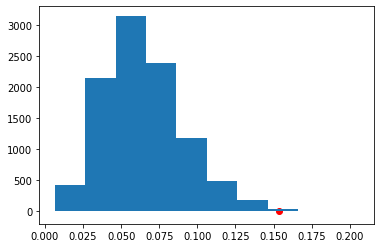

In [54]:
plt.hist(TEST_STATS)
plt.scatter(OBSERVED_TVD, 0, c="red")

In [55]:
p_value = (np.array(TEST_STATS) >= OBSERVED_TVD).mean()

p_value

0.0038

#### Permutation Testing: Individual LandUse and Traffic Volume

-359.0392128731777


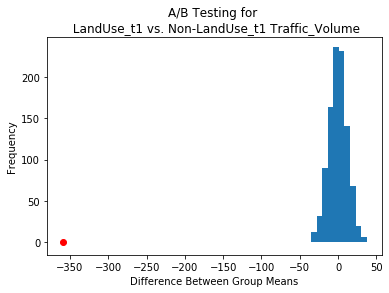

In [222]:
nyc_traffic_EDA_temp = nyc_traffic_EDA.copy()
LANDUSE_COLUMN = LANDUSE_COLUMNS[0]
TABLE = nyc_traffic_EDA_temp
GROUPBY_COLUMN_NAME = LANDUSE_COLUMN
AGGREG_COLUMN_NAME = "Traffic_Volume"
SHUFFLED_COLUMN_NAME = GROUPBY_COLUMN_NAME
#SHUFFLED_COLUMN_NAME = AGGREG_COLUMN_NAME
SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values

AB_TESTING_PLOT_TITLE = "A/B Testing for {0} \n When {1} >50% vs. <50%".format(AGGREG_COLUMN_NAME, GROUPBY_COLUMN_NAME)
AB_TESTING_PLOT_X_LABEL = "Difference Between Group Means"
AB_TESTING_PLOT_Y_LABEL = "Frequency"

test_stats = []
T = 1000

TABLE[GROUPBY_COLUMN_NAME] = (TABLE[GROUPBY_COLUMN_NAME] >= 0.5)
SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values

observed_test_stat = TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]

for i in range(T):
    SHUFFLED_COLUMN = np.random.permutation(SHUFFLED_COLUMN)
    # shuffle
    TABLE[SHUFFLED_COLUMN_NAME] = SHUFFLED_COLUMN
    # re-assign
    test_stat = TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]
    test_stats.append(test_stat)

plt.hist(test_stats)
plt.title(AB_TESTING_PLOT_TITLE)
plt.xlabel(AB_TESTING_PLOT_X_LABEL)
plt.ylabel(AB_TESTING_PLOT_Y_LABEL)


plt.scatter(observed_test_stat,0,color="red")
print(observed_test_stat)